<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#iModulon-Investigation" data-toc-modified-id="iModulon-Investigation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>iModulon Investigation</a></span><ul class="toc-item"><li><span><a href="#Check-GO-and-KEGG-Enrichments" data-toc-modified-id="Check-GO-and-KEGG-Enrichments-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check GO and KEGG Enrichments</a></span></li><li><span><a href="#Show-Gene-Information-for-iModulon" data-toc-modified-id="Show-Gene-Information-for-iModulon-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Show Gene Information for iModulon</a></span></li><li><span><a href="#Plot-Gene-Weights" data-toc-modified-id="Plot-Gene-Weights-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot Gene Weights</a></span></li><li><span><a href="#Plot-Activities" data-toc-modified-id="Plot-Activities-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Plot Activities</a></span></li><li><span><a href="#Plot-Regulon" data-toc-modified-id="Plot-Regulon-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot Regulon</a></span></li><li><span><a href="#Explained-Variance" data-toc-modified-id="Explained-Variance-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Explained Variance</a></span></li><li><span><a href="#Rename-iModulon" data-toc-modified-id="Rename-iModulon-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Rename iModulon</a></span></li></ul></li></ul></div>

In [20]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model, save_to_json
from pymodulon.util import explained_variance
import pandas as pd

pd.set_option('display.max_rows', 500)

# Load Data

In [3]:
ica_data = load_json_model('../data/p_syringae.json')

In [4]:
go_enrichments = pd.read_csv('../data/GO_enrichments.csv', index_col=0)
kegg_pathway_enrichments = pd.read_csv('../data/kegg_pathway_enrichments.csv', index_col=0)
kegg_module_enrichments = pd.read_csv('../data/kegg_module_enrichments.csv', index_col=0)

# iModulon Investigation

Use this block with any iModulon to attempt to annotate it

In [5]:
print('All iModulons:')
print(ica_data.imodulon_names)

All iModulons:
['Nitrogen', 1, 'Motility', 'Sulfur-1', 'Recombination', 5, 'IS-elements', 'Molybdenum', 'Alginate', 'Resistance', 'Sulfur-2', 11, 'Plasmid A', 'Carb Transport', 'Chaperone', 'Coronatine', 16, 17, 'Nt/Ribosome', 'single_gene_1', 'single_gene_2', 'Fe/Protein Transport', 'Inositol', 'Phage', 'Protocatechuate', 'Flagella-1', 'Fur', 'Bactin', 28, 'Fatty Acid', 'Phosphate', 'Secretion', 'Folate', 'Pyoverdine', 34, 'Flagella-2', 'Translation', 'T3SS', 'Glycan', 'Copper', 40, 'single_gene_3', 'single_gene_4', 'single_gene_5', 'Fe-S']


In [13]:
iM_to_annotate = 1

## Check GO and KEGG Enrichments

In [14]:
go_enrichments[go_enrichments['imodulon'] == iM_to_annotate]

,imodulon,gene_ontology,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size


In [15]:
kegg_pathway_enrichments[kegg_pathway_enrichments['imodulon'] == iM_to_annotate]

,imodulon,kegg_id,pvalue,qvalue,precision,recall,f1score,TP,target_set_size,imodulon_size,pathway_name


## Show Gene Information for iModulon

In [16]:
ica_data.view_imodulon(iM_to_annotate).sort_values(by='gene_weight', ascending=False)[[
    'start', 'gene_weight', 'gene_name', 'gene_product', 'COG', 'regulator', 'uniprot'
]]

,start,gene_weight,gene_name,gene_product,COG,regulator,uniprot
PSPTO_RS22450,4881167,0.089339,PSPTO_RS22450,type III effector,No COG annotation,NaN,A0A0Q0GN95
PSPTO_RS22610,4924208,0.083631,PSPTO_RS22610,amino acid transporter,Function unknown,NaN,A0A099SNZ6
PSPTO_RS29950,4846182,0.076324,PSPTO_RS29950,hypothetical protein,No COG annotation,NaN,UPI0001E282DF
PSPTO_RS22565,4916238,0.071694,PSPTO_RS22565,GNAT family N-acetyltransferase,Function unknown,NaN,A0A099SLE2
PSPTO_RS22155,4811663,0.071021,PSPTO_RS22155,SIR2 family protein,Transcription,NaN,A0A0Q0HTK0
PSPTO_RS22655,4934495,0.070056,PSPTO_RS22655,class I SAM-dependent methyltransferase,"Secondary metabolites biosynthesis, transport,...",NaN,A0A0N0WGD0
PSPTO_RS22435,4879585,0.070028,PSPTO_RS22435,ATP-binding protein,Function unknown,NaN,None
PSPTO_RS17015,3716749,0.068909,PSPTO_RS17015,hypothetical protein,No COG annotation,NaN,A0A0N8T7C1
PSPTO_RS22360,4862886,0.068131,PSPTO_RS22360,inorganic phosphate transporter,Inorganic ion transport and metabolism,NaN,A0A0K8M4P7
PSPTO_RS22125,4806458,0.067842,PSPTO_RS22125,TetR/AcrR family transcriptional regulator,Transcription,NaN,A0A0Q0D1V4


## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='1 Gene Weight'>

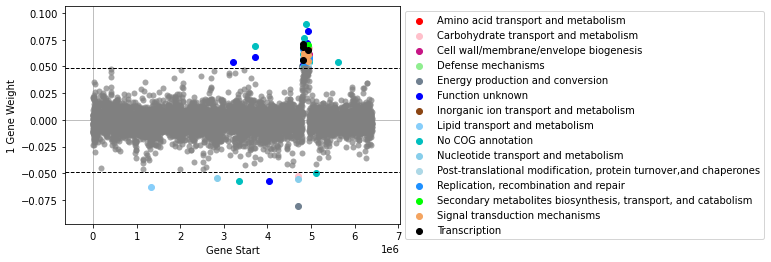

In [17]:
plot_gene_weights(ica_data, iM_to_annotate)

## Plot Activities

<AxesSubplot:ylabel='1 iModulon\nActivity'>

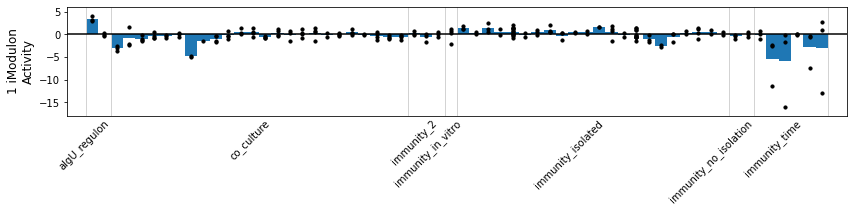

In [18]:
plot_activities(ica_data, iM_to_annotate)

## Plot Regulon

<AxesSubplot:xlabel='36 Gene Weight', ylabel='Number of Genes'>

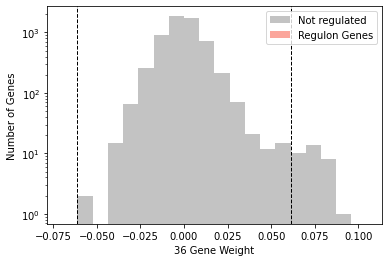

In [516]:
plot_regulon_histogram(ica_data, iM_to_annotate, regulator=iM_to_annotate)

## Explained Variance

In [23]:
exp_var = [explained_variance(ica_data, imodulons=[im]) for im in ica_data.imodulon_names]
ica_data.imodulon_table['exp_var'] = exp_var

## Rename iModulon

In [577]:
ica_data.rename_imodulons({iM_to_annotate: 'Fe-S'})

In [24]:
save_to_json(ica_data, '../data/p_syringae.json')

In [25]:
ica_data.imodulon_table.to_csv('iModulon_table.csv')